# Proyecto Pick-ups Uber NY

Para la construcción de este dataframe se utilizaran funciones de pandas para leer los archivos csv y concatenar todos los registros.

Posteriormente se plantea las siguientes preguntas a describir :

- ¿Cual es el comportamiento de los viajes ?
 
Para esto hay que analizar por determinadas instancias en que se representa un registro. 

Debido a dentro del registro denominado Date/time se describia por :
- Mes
- Dia 
- Hora 

Por lo que se desglosara los datos para averiguar el comportamiento a través del tiempo de esta base de datos de viajes de uber en la ciudad de nueva york.


In [ ]:
import glob
import os
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 

all_files = glob.glob("C:/Users/sebas/OneDrive/Escritorio/MASTER DATA SCIENCE/Trimestre 3/analítica de datos/Proyecto_uber/Datos/uber-raw*.csv")

file_list = []
for f in all_files:
    df = pd.read_csv(f) ## cambia a leer csv
    nombre = os.path.basename(f)
    df['source_file'] = nombre 
    file_list.append(df)

df = pd.concat(file_list, ignore_index = True)  
df.head(5)  

,Date/Time,Lat,Lon,Base,source_file
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,uber-raw-data-apr14.csv
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,uber-raw-data-apr14.csv
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,uber-raw-data-apr14.csv
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,uber-raw-data-apr14.csv
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,uber-raw-data-apr14.csv


Ya concatenando se pueden observar las columnas para estudiar y 
la cantidad de registros.

Columnas : 
- Date/Time : instancia en que empieza el viaje
- Lat : Latitud del registro
- Lon : Longitud del registro
-Base : zona de nueva york 

Son 4.534.327 registros en Total. 

In [ ]:
df.dtypes

Date/Time       object
Lat            float64
Lon            float64
Base            object
source_file     object
dtype: object

Se observa que nuestra variable de estudio para realizar un 
análisis descriptivo es nuestra columna "Date/Time" y que 
al momento de leer los archivos csv este se transformo 
a tipo string.

Como no solo nos gustaría poder usar la serie de tiempo de 
los eventos sino que igualmente para responder a las siguientes 
preguntas será necesario un arreglo de formato de los datos. 

-¿ Como se comporta la demanda con respecto a mes, dia , hora?

Para esto es que requerimos pivotear nuestro dataframe y lograr
generar columnas que nos puedan ayudar a agrupar los datos en 
manera a su valor, logrando una estadistica descriptiva de los 
sucesos por : 
-Mes 
-Dia de la semana 
-hora del evento 

Por lo que nos ayuda a realizar la siguiente hipotesis : 

-¿Como es la demanda a través del día (24 hrs)?

In [ ]:
# Creamos nuestras listas de interes para nuestro dataframe
mm=[]
dd=[]
yy=[]
hrs=[]
dow=[]
dow_list = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]

dt_time = df['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    mm.append(dt_time[i].split(" ")[0].split("/")[0])

dt_time = df['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    dd.append(dt_time[i].split(" ")[0].split("/")[1])

dt_time = df['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    yy.append(dt_time[i].split(" ")[0].split("/")[2])

dt_time = df['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    hrs.append(dt_time[i].split(" ")[1].split(":")[0])

for i in range(len(mm)):
    dow.append(dow_list[ datetime.date( int(yy[i]),
                                        int(mm[i]),
                                        int(dd[i])).weekday() 
                        ])
    
print(len(dd),len(mm),len(yy),len(hrs),len(dow))

df['Mes'] = mm
df['Dia'] = dd
df['Year'] = yy 
df['Hora'] = hrs
df['Dia_semana'] = dow

#Renombrar la columna a Date/time 
df = df.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

#eliminamos la columna del archivo de origen 
del df["source_file"]


4534327 4534327 4534327 4534327 4534327


In [ ]:
df

,Date_time,Lat,Lon,Base,Mes,Dia,Year,Hora,Dia_semana
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,2014,0,Martes
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,2014,0,Martes
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,2014,0,Martes
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,2014,0,Martes
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,2014,0,Martes
...,...,...,...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,30,2014,22,Martes
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,30,2014,22,Martes
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,30,2014,22,Martes
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,30,2014,22,Martes


In [ ]:
df.dtypes

Date_time     datetime64[ns]
Lat                  float64
Lon                  float64
Base                  object
Mes                   object
Dia                   object
Year                  object
Hora                  object
Dia_semana            object
dtype: object

In [ ]:
df.sort_values(by='Date_time')
df

,Date_time,Lat,Lon,Base,Mes,Dia,Year,Hora,Dia_semana
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,2014,0,Martes
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,2014,0,Martes
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,2014,0,Martes
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,2014,0,Martes
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,2014,0,Martes
...,...,...,...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,30,2014,22,Martes
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,30,2014,22,Martes
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,30,2014,22,Martes
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,30,2014,22,Martes


Finalmente se observa que nuestra columna de Date_time ahora es 
de tipo fecha , y crear nuestras series temporales de interés. 

Antes de hacer la visualización de nuestra serie temporal 
realizaremos un análisis descriptivo a las diferentes columnas
que fueron creadas : 
- Mes 
- Dia 
- Year 
- Hora
- Dia de semana 

### Análisis Por mes

In [ ]:
#Grouping by Month 
df_mes_grouped = df.groupby(['Mes']).count()

#Creating the sub dataframe
df_mes = pd.DataFrame({'Numero_de_viajes':df_mes_grouped.values[:,0]}, index = df_mes_grouped.index) 

df_mes

,Numero_de_viajes
Mes,
4,564516
5,652435
6,663844
7,796121
8,829275
9,1028136


Para conveniencia de filtros y orden , los meses son representados 
en forma cuantitativa para hacer mejor descripción. Cada mes es 
su determinado número correspondiente del año.

C:\Users\sebas\AppData\Local\Temp\ipykernel_29204\1449900115.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


[Text(0, 0.0, '0 viajes'),
 Text(0, 200000.0, '200,000 viajes'),
 Text(0, 400000.0, '400,000 viajes'),
 Text(0, 600000.0, '600,000 viajes'),
 Text(0, 800000.0, '800,000 viajes'),
 Text(0, 1000000.0, '1,000,000 viajes'),
 Text(0, 1200000.0, '1,200,000 viajes')]

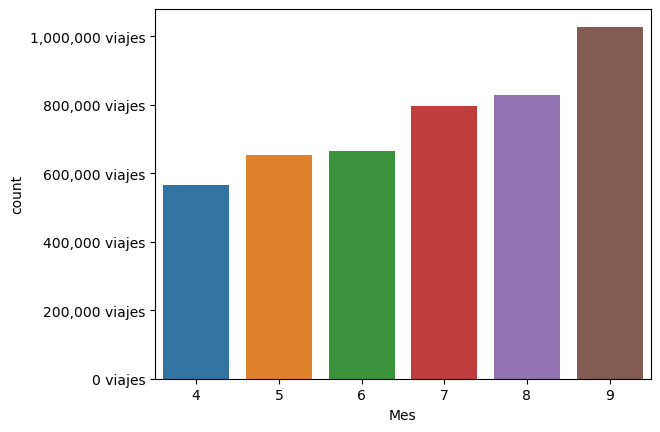

In [ ]:
df_mes1 = df["Mes"].sort_values()
g = sns.countplot(x=df_mes1)
ylabels = ['{:,.0f}'.format(y) + ' viajes' for y in g.get_yticks()]
g.set_yticklabels(ylabels)


Analizando como se va comportando , se observa un crecimiento 
de cada mes , lograndose notar entre los meses 8 y 9 (agosto y
septiembre) el mayor aumento de viajes.

In [ ]:

number_of_trips_abr = df_mes.loc['4'].values
number_of_trips_may = df_mes.loc['5'].values
number_of_trips_jun = df_mes.loc['6'].values
number_of_trips_jul = df_mes.loc['7'].values
number_of_trips_aug = df_mes.loc['8'].values
number_of_trips_sep = df_mes.loc['9'].values

In [ ]:
ratio_month1 = (((number_of_trips_may - number_of_trips_abr) / number_of_trips_abr) * 100)[0]
ratio_month1 = round(ratio_month1)
ratio_month2 = (((number_of_trips_jun - number_of_trips_may) / number_of_trips_may) * 100)[0]
ratio_month2 = round(ratio_month2)
ratio_month3 = (((number_of_trips_jul - number_of_trips_jun) / number_of_trips_jun) * 100)[0]
ratio_month3 = round(ratio_month3)
ratio_month4 = (((number_of_trips_aug - number_of_trips_jul) / number_of_trips_jul) * 100)[0]
ratio_month4 = round(ratio_month4)
ratio_month5 = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)[0]
ratio_month5 = round(ratio_month5)

print('El incremento de viajes de Mayo con respecto a Abril {} %.'.format(ratio_month1))
print('El incremento de viajes de Junio con respecto a Mayo {} %.'.format(ratio_month2))
print('El incremento de viajes de Julio con respecto a Junio {} %.'.format(ratio_month3))
print('El incremento de viajes de Agosto con respecto a Julio {} %.'.format(ratio_month4))
print('El incremento de viajes de septiembre con respecto a agosto {} %.'.format(ratio_month5))

El incremento de viajes de Mayo con respecto a Abril 16 %.
El incremento de viajes de Junio con respecto a Mayo 2 %.
El incremento de viajes de Julio con respecto a Junio 20 %.
El incremento de viajes de Agosto con respecto a Julio 4 %.
El incremento de viajes de septiembre con respecto a agosto 24 %.


Se observa en en el siguiente gráfico como se comporta
el ratio de aumento de viajes con respecto a su periodo 
anterior.

([<matplotlib.axis.XTick at 0x18c6c675130>,
 [Text(0, 0, 'May-Abril'),
  Text(1, 0, 'Jun-May'),
  Text(2, 0, 'Jul-Jun'),
  Text(3, 0, 'Aug-Jul'),
  Text(4, 0, 'Sep-Aug')])

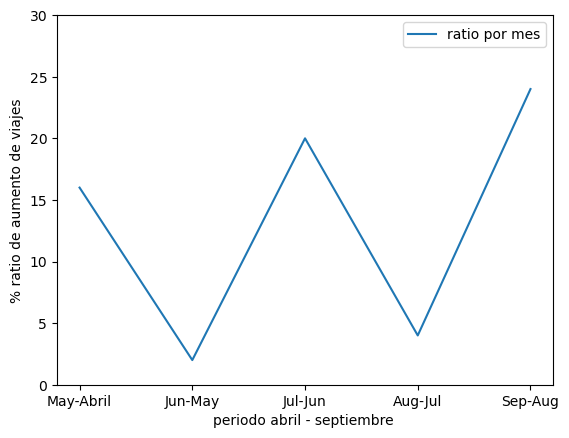

In [ ]:
lista1 = [ratio_month1,ratio_month2,ratio_month3,ratio_month4,ratio_month5]
plt.plot(lista1,label ='ratio por mes')
plt.legend()
plt.ylim(0, 30)
plt.xlabel("periodo abril - septiembre ")
plt.ylabel("% ratio de aumento de viajes")
plt.xticks([0, 1, 2,3,4],['May-Abril', 'Jun-May', 'Jul-Jun','Aug-Jul','Sep-Aug'])

### Viajes por dia 

In [ ]:
#Grouping by Day
df_day_grouped = df.groupby(['Dia'],as_index=False).count()

#Creating the grouped DataFrame
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index) 



df_day.head()



,Number_of_trips
0,1
1,10
2,11
3,12
4,13


In [ ]:
len(df_day)

31

([<matplotlib.axis.XTick at 0x18c6cbfab80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

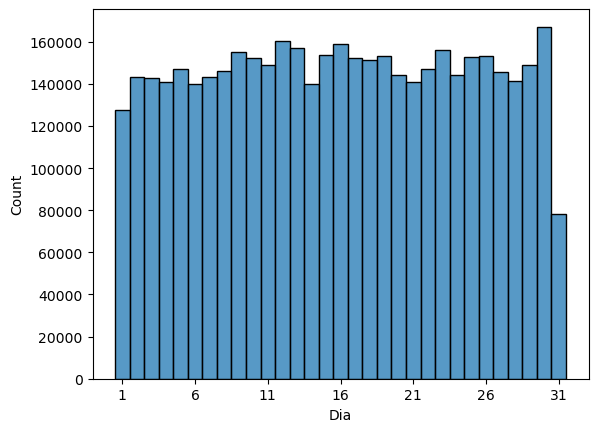

In [ ]:
sns.histplot(df["Dia"], kde=False)
plt.xticks([0,5,10,15,20, 25,30])

Podemos observar que en los dias 31 de las fuente de datos es memor 
pero esto es por la diferencia de dias 31 que hay en un determinado
mes. 

Si se quisiera omitir este dia para ver el comportamiento, 
se observa que el dia 30 del mes hay un mayor numero de viajes.

Esto se puede deber a que usualmente los usuarios estan recien pagados
y tratan de aprovechar de alguna salida o consumo. Tambíen se puede 
plantear que el usuario esta haciendo mas tramites que requieran
el uso de taxi como ir de compras o tambien salidas personales.

### Viajes por dia de semana 

In [ ]:
#Grouping by Weekday
df_weekday_grouped = df.groupby(['Dia_semana'], sort = False).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 

df_weekday



,Number_of_trips
Dia_semana,
Martes,663789
Miercoles,696488
Jueves,755145
Viernes,741139
Sabado,646114
Domingo,490180
Lunes,541472


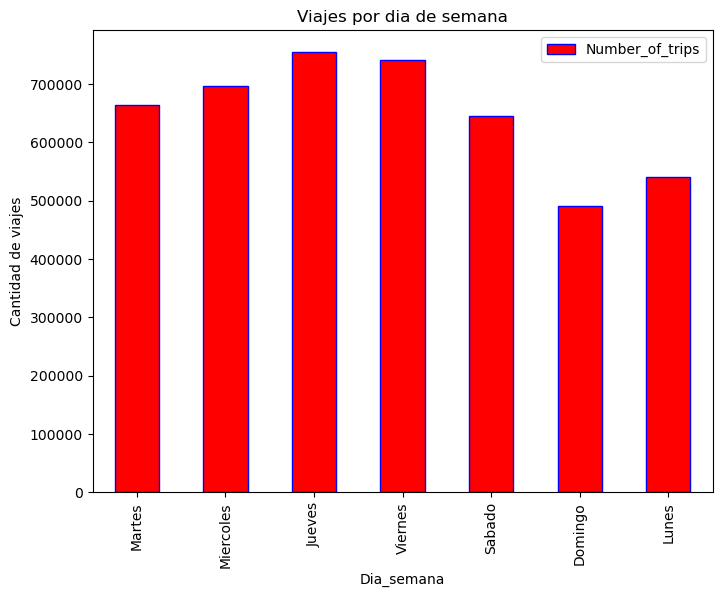

In [ ]:
df_weekday.plot(kind='bar', figsize=(8,6), color=('red'),  edgecolor='blue')

plt.ylabel('Cantidad de viajes')
plt.title('Viajes por dia de semana')

plt.show()

Como se puede obervar el numero de mayor viajes se pueden 
ver en la semana mas que los dias de fin de semana. 

In [ ]:
#Getting the mean number of trips in the weekend - Non working day
mean_number_of_trips_weekend = ((df_weekday.loc['Sabado'] + df_weekday.loc['Domingo']) / 2).values

#Getting the mean number of trips for the rest of the week- Working day
mean_number_of_trips_workday = (((df_weekday.loc['Lunes'] + df_weekday.loc['Martes'] + df_weekday.loc['Miercoles'] + df_weekday.loc['Jueves'] + df_weekday.loc['Viernes'])/ 5).values)[0]

ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend) / mean_number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)

print('El promedio de imagenes es mayor un {}% por sobre el fin de semana .'.format(ratio_weekday))

El promedio de imagenes es mayor un 19.6% por sobre el fin de semana .


C:\Users\sebas\AppData\Local\Temp\ipykernel_29204\3440808104.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Dia"])


<AxesSubplot:xlabel='Dia', ylabel='Density'>

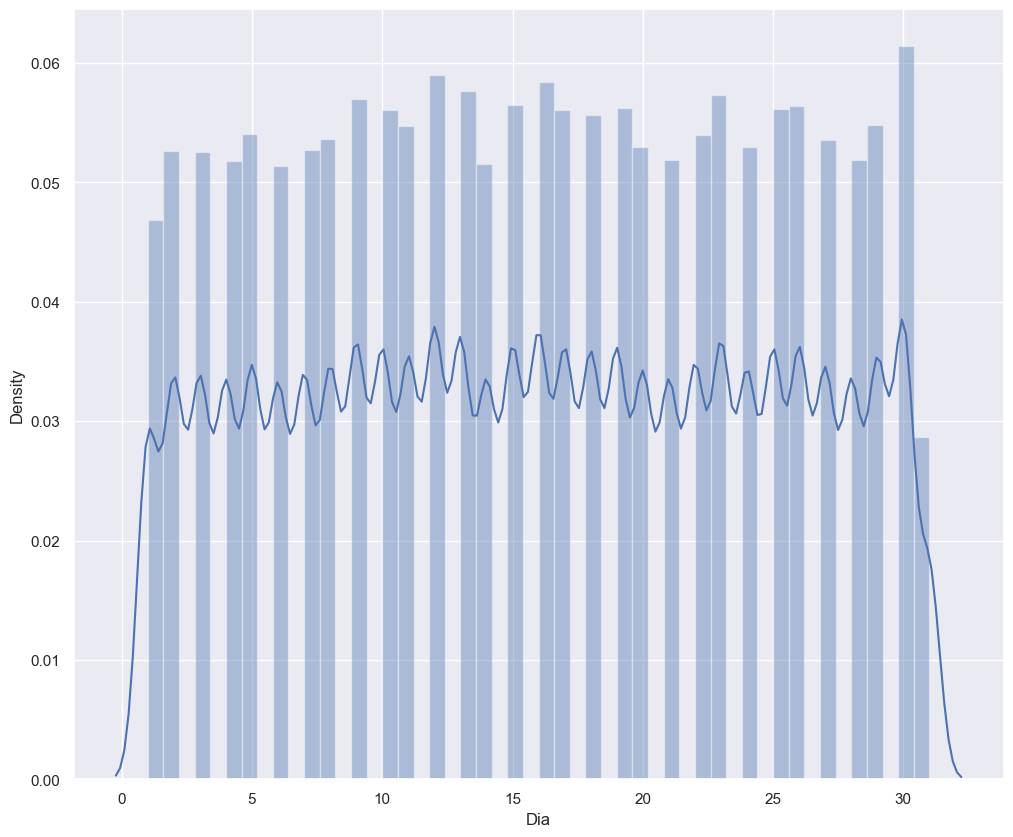

In [ ]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(df["Dia"])

### Por hora 

In [ ]:
#Grouping by Hour 
df_hour_grouped = df.groupby(['Hora'].).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Numero de viajes':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 

df_hour.head()



,Numero de viajes
Hora,
0,103836
1,67227
10,159148
11,165703
12,170452


<AxesSubplot:xlabel='Hora', ylabel='Count'>

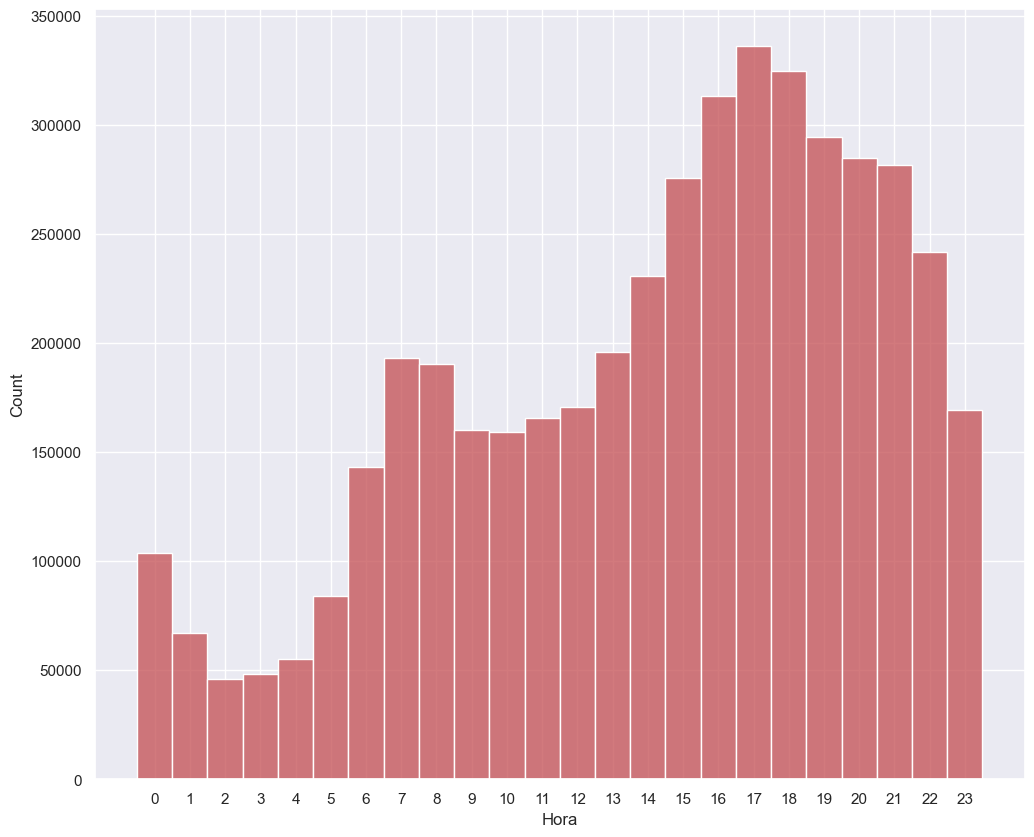

In [ ]:
sns.histplot(df["Hora"],color="r")

Como pueden ver su distribución de las horas, los viajes se 
puede ver su poca demanda hasta las 5:00 am.

Todo se mantiene con tasa incremental de demanda a través del dia 
hasta las 18:00 horas que es la hora con mayor demanda.

Esta se debe por las horas de salidas del trabajo de los usuarios. 

Ahora que sabemos la forma en que se comporta podriamos representarlo con un mapa de calor.Para estos relacionaremos
la variable Hora con respecto a las diferentes variables 
de estudio.

### Analisis Cruzado

#### mapa de calor de hora y dia 

In [ ]:
#Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

In [ ]:
#Creating the hour and day dataframe
df_hour_day = df.groupby('Hora Dia'.split()).apply(count_rows).unstack()
df_hour_day.head()

Dia,1,10,11,12,13,14,15,16,17,18,...,29,3,30,31,4,5,6,7,8,9
Hora,,,,,,,,,,,,,,,,,,,,,
0,3247,3351,3093,3276,5517,3810,2543,2595,3208,3447,...,2732,3415,2439,2209,2944,2786,4623,3715,2882,2708
1,1982,2167,1699,2187,3594,2399,1557,1622,2084,2178,...,1862,2176,1547,1407,1718,1567,2932,2326,1672,1757
10,4680,5070,5313,5248,5535,4998,5434,5720,5089,5237,...,5321,4864,6084,2607,4822,5225,4891,4982,5368,5500
11,4811,5513,5515,5417,5844,5206,5622,5564,5407,5580,...,5256,5162,6202,2823,5067,5097,5264,5266,5433,5542
12,5018,5617,5611,5674,6015,5251,5614,5621,5739,5586,...,5331,5462,6543,2997,5289,5129,5528,5455,5576,5607


In [ ]:
df_hour_day

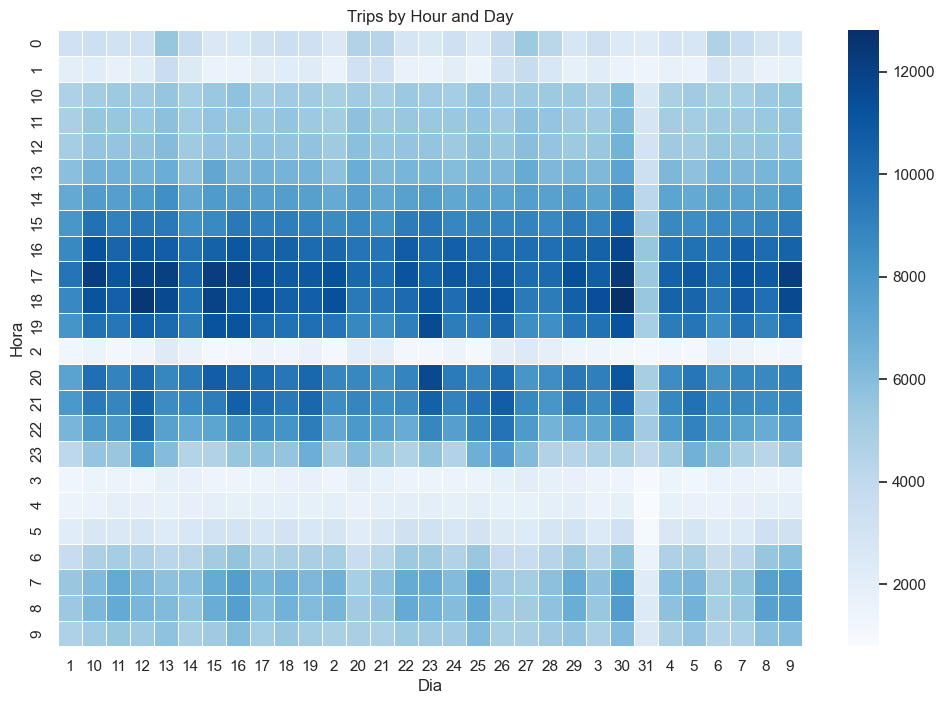

In [ ]:
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(df_hour_day, cmap='Blues', linewidth = .5)
ax.set(title="Trips by Hour and Day");

In [ ]:

all_files = glob.glob("C:/Users/sebas/OneDrive/Escritorio/MASTER DATA SCIENCE/Trimestre 3/analítica de datos/Proyecto_uber/Datos/uber-raw*.csv")

file_list1 = []
for f in all_files:
    df2 = pd.read_csv(f) ## cambia a leer csv
    nombre = os.path.basename(f)
    df2['source_file'] = nombre 
    file_list1.append(df2)

df2 = pd.concat(file_list1, ignore_index = True)  
df2.head(5)  

,Date/Time,Lat,Lon,Base,source_file
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,uber-raw-data-apr14.csv
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,uber-raw-data-apr14.csv
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,uber-raw-data-apr14.csv
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,uber-raw-data-apr14.csv
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,uber-raw-data-apr14.csv


In [ ]:
#Renaming the Date/Time Colomn
df2 = df.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df2['Date_time'] = pd.to_datetime(df2['Date_time'])

#Adding usufull colomns
df2['Month'] = df2['Date_time'].dt.month_name()
df2['Weekday'] = df2['Date_time'].dt.dayofweek
df2['Day'] = df2['Date_time'].dt.day
df2['Hour'] = df2['Date_time'].dt.hour
df2['Minute'] = df2['Date_time'].dt.minute

In [ ]:
#Creating the hour and day dataframe
df_hour_day2 = df2.groupby('Hour Day'.split()).apply(count_rows).unstack()
df_hour_day2.head()

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,3247,2480,3415,2944,2786,4623,3715,2882,2708,3351,...,2852,2605,3277,2442,3887,5304,4224,2732,2439,2209
1,1982,1600,2176,1718,1567,2932,2326,1672,1757,2167,...,1662,1608,2090,1525,3123,3712,2711,1862,1547,1407
2,1284,1109,1434,1217,1047,1902,1533,1147,1246,1495,...,1207,1163,1480,1098,2087,2407,1894,1442,1135,1107
3,1331,1442,1489,1449,1278,1599,1622,1509,1501,1466,...,1503,1465,1520,1472,1840,2098,1846,1717,1436,935
4,1458,1897,1578,1737,1648,1584,1793,1921,1911,1614,...,1984,1994,1825,1972,1770,1759,1916,1990,1864,788


[Text(0.5, 1.0, 'Viajes de Uber a traves del día')]

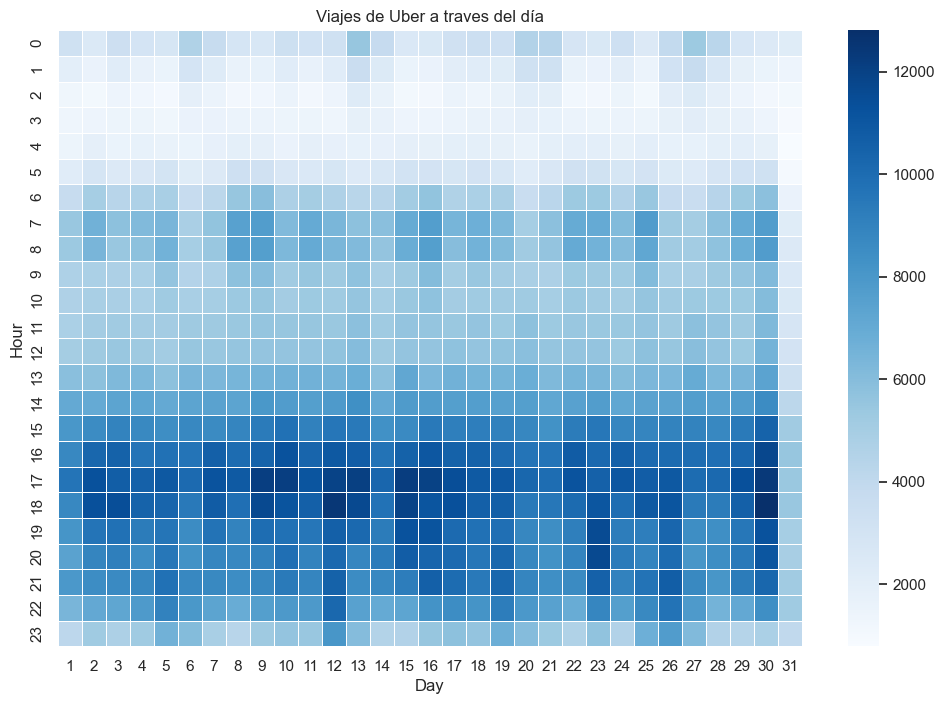

In [ ]:
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(df_hour_day2, cmap='Blues', linewidth = .5)
ax.set(title="Viajes de Uber a traves del día")

Las mismas horas pick de las 18:00 se ve reflejado

#### Por hora y dia de semana 

In [ ]:
df_hour_weekday = df2.groupby('Hour Dia_semana'.split(), sort = False).apply(count_rows).unstack()
df_hour_weekday.head()

Dia_semana,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes
Hour,,,,,,,
0,6237,7644,9293,13716,27633,32877,6436
1,3509,4324,5290,8163,19189,23015,3737
2,2571,3141,3719,5350,12710,15436,2938
3,4494,4855,5637,6930,9542,10597,6232
4,7548,7511,8505,8806,6846,6374,9640


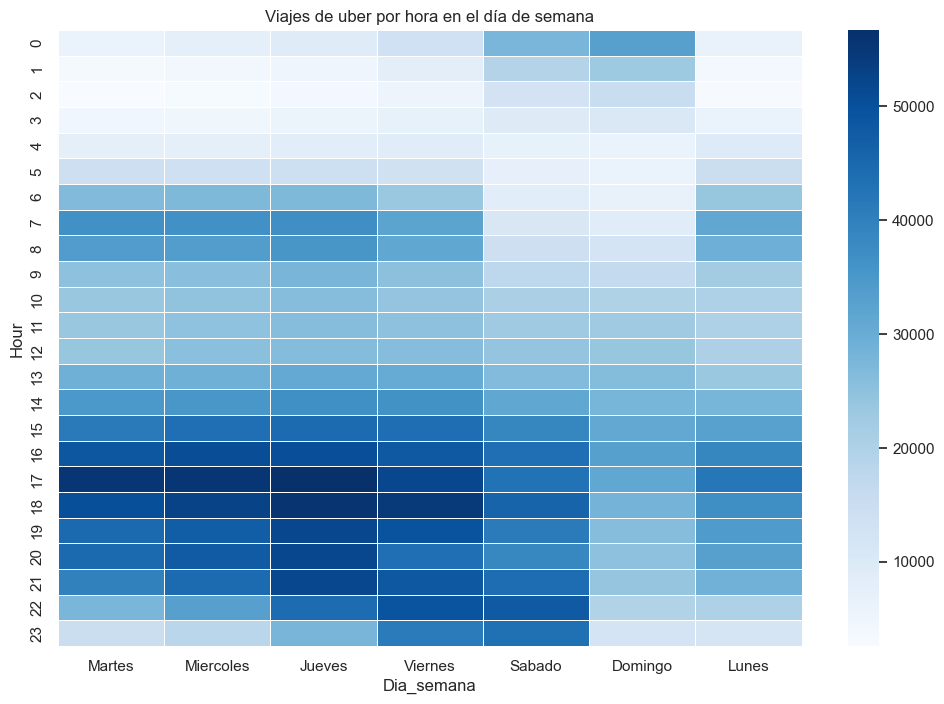

In [ ]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_hour_weekday, cmap='Blues', linewidth = .5)
ax.set(title="Viajes de uber por hora en el día de semana");



Ahora que entendemos como es la diferente demanda con respecto 
al tiempo , podemos buscar visualizar como es que se agrupan 
estos datos , ya que poseemos información de su latitud
y longitud.


In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/datos.csv")

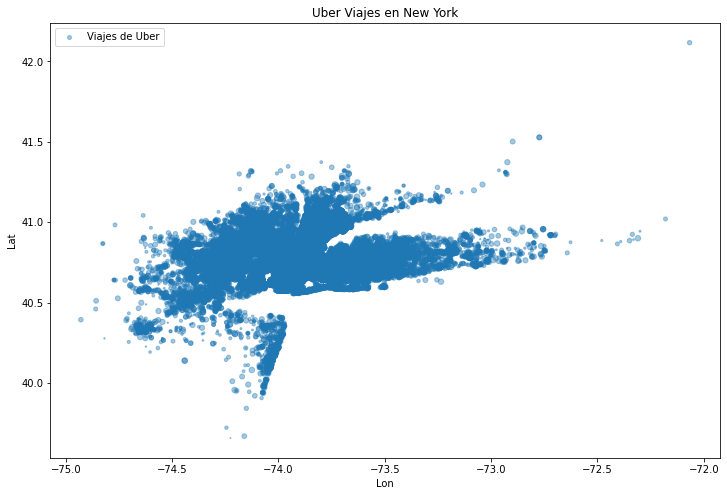

In [4]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=df['Day'], label='Viajes de Uber',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Viajes en New York")
plt.legend()
plt.show()

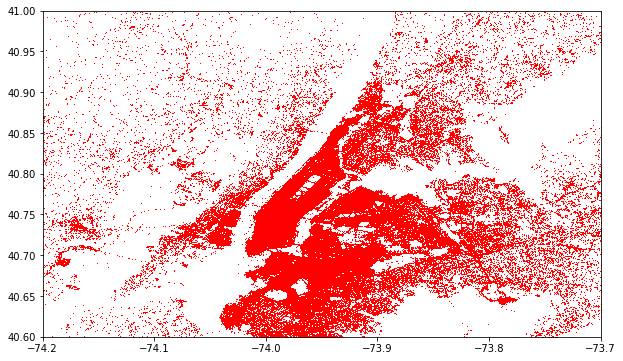

In [5]:
plt.figure(figsize=(10,6))

plt.plot(df['Lon'], df['Lat'],'r+', ms=0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6,41)
plt.show()

In [6]:
#Setting up the limits
top, bottom, left, right = 41, 40.55, -74.3, -73.6

#Extracting the Longitude and Latitude of each pickup in our dataset
Longitudes = df['Lon'].values
Latitudes  = df['Lat'].values

In [10]:
!pip install basemap
from mpl_toolkits import basemap
print(basemap.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 7.0 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 17.1 MB 34 kB/s 
     |████████████████████████████████| 7.8 MB 44.5 MB/s 
     |████████████████████████████████| 30.5 MB 175 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


1.3.6


No se puede distingir la diferencia entre algunos sectores usando una nube de puntos , por lo que para poder identificar de manera geografica las latitudes y las longitudes se utilizara la libreria basemap que nos permite extraer con un mapa satelital las diferentes nubes de puntos e identificar concentraciones de datos con respecto a los viajes historicos

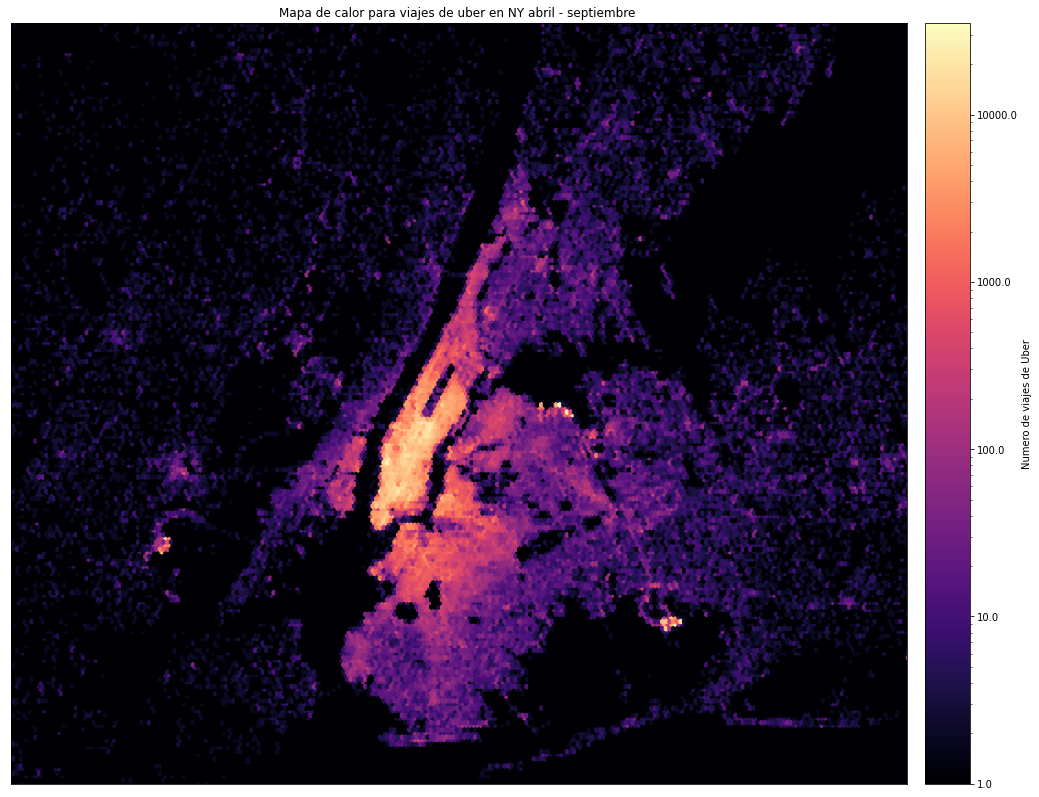

In [12]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm #Colormap
plt.figure(figsize=(18, 14))
plt.title('Mapa de calor para viajes de uber en NY abril - septiembre ')

#https://matplotlib.org/basemap/api/basemap_api.html
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.magma)
map.colorbar(location='right', format='%.1f', label='Numero de viajes de Uber')

Como se pueden observar hay una mayor concentracion en NY pero igualmente se ven unos puntos brillantes alrededor de este. Son estas zonas en la cual se concentran los viajes de puntos por lo que esto nos puede guiar a responder si acaso las Bases de salida serian estos mismos. 

Procedemos a ver sus comportamiento.

B02617    0.321735
B02598    0.307237
B02682    0.267468
B02764    0.058200
B02512    0.045359
Name: Base, dtype: float64

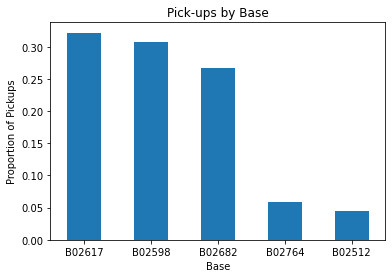

In [54]:
base_props = df['Base'].value_counts(normalize=True)
display(base_props)

base_props.plot(kind='bar', rot=0)
plt.xlabel('Base')
plt.ylabel('Proportion of Pickups')
plt.title('Pick-ups by Base');

In [46]:
month_map = {
    4: 'April',
    5: 'May',
    6: 'June', 
    7: 'July',
    8: 'August',
    9: 'September'
}

<Figure size 720x432 with 0 Axes>

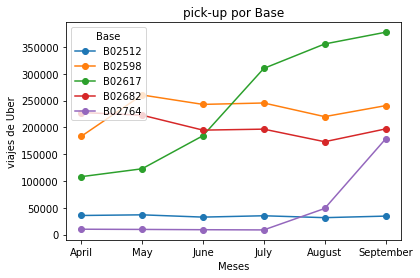

In [53]:
monthly_bases = df.groupby('Month')['Base'].value_counts().unstack()
plt.figure(figsize=(10,6))
monthly_bases.loc[month_map.values()].plot(kind='line', marker='o', rot=0)
plt.ylabel('viajes de Uber')
plt.xlabel('Meses')
plt.title('pick-up por Base');

# Modelos de Machine learning 

### Aprendizaje no supervisado

para empezar a ver si es posuble identificar la demanda utilizaremos K-means , cuya función nos representara los diferentes clusters del set de datos. 

Para poder seleccionar nuestras columnas de interés es posible solo ver que la longitud y la latitud serian nuestros valores sin etiqueta , para ser representado en un subespacio. En este caso los viajes de Uber.

In [48]:
clus = df[['Lat','Lon']]
clus.dtypes

Lat    float64
Lon    float64
dtype: object

Buscar cual seria el valor de K óptimo para modelar K-means.

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f9fa0ecdd30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.8/ctypes/__init__.py", line 373, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so: cannot open shared 

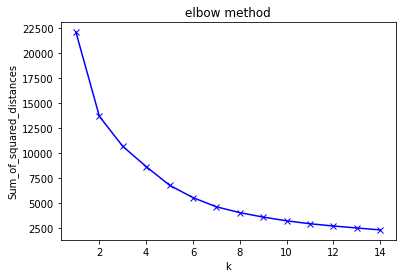

In [49]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,max_iter=300,random_state=12345)
    km = km.fit(clus)
    Sum_of_squared_distances.append(km.inertia_)

# Encontrar el k optimo
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('elbow method')
plt.show()

In [62]:
# Asignando el numero de clusters para K-means.
kmeans=KMeans(n_clusters=6,max_iter=300,random_state=12345)
kmeans.fit(clus)
labels=kmeans.labels_
clus['clusters'] = labels

<ipython-input-62-2ea87f252ce5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus['clusters'] = labels


Con 7 y 6 Clusters:

In [72]:
# storing cluster centroids
cent = kmeans.cluster_centers_
print(cent)

newFrame = pd.DataFrame(cent)

newFrame.columns=['Lat','Lon','2']
print(newFrame)

[[ 4.07312998e+01 -7.39981077e+01 -9.15933995e-12]
 [ 4.06875427e+01 -7.39645316e+01  3.00000000e+00]
 [ 4.07661897e+01 -7.39725022e+01  1.00000000e+00]
 [ 4.06579930e+01 -7.37834407e+01  4.00000000e+00]
 [ 4.07931946e+01 -7.38798208e+01  2.00000000e+00]
 [ 4.07317057e+01 -7.40486262e+01  5.00000000e+00]]
         Lat        Lon             2
0  40.731300 -73.998108 -9.159340e-12
1  40.687543 -73.964532  3.000000e+00
2  40.766190 -73.972502  1.000000e+00
3  40.657993 -73.783441  4.000000e+00
4  40.793195 -73.879821  2.000000e+00
5  40.731706 -74.048626  5.000000e+00


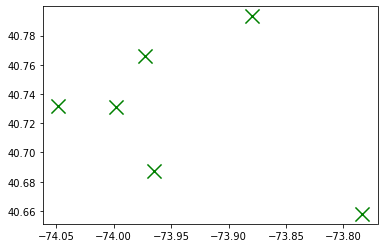

In [75]:
# plotting centroids in the scatter plot
plt.scatter(newFrame['Lon'],newFrame['Lat'],marker='x',color='G',s=200)
plt.show()

In [74]:
newFrame

,Lat,Lon
0,40.731300,-73.998108
1,40.687543,-73.964532
2,40.766190,-73.972502
3,40.657993,-73.783441
4,40.793195,-73.879821
5,40.731706,-74.048626


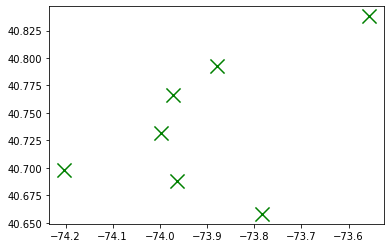

In [57]:
# plotting centroids in the scatter plot
plt.scatter(newFrame['Lon'],newFrame['Lat'],marker='x',color='G',s=200)
plt.show()

In [58]:
# predicting a new location.
anotherLocation = [(40.6556,-73.5631)]
kmeans.predict(anotherLocation)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([6], dtype=int32)